In [1]:
import pandas as pd

In [2]:
data = pd.read_csv ('cricketers.csv',delimiter='\t')

In [3]:
data.describe()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.00000,109.000000,109.000000,109.000000
mean,9.559633,7.889908,173.633028,43.495413,124.669725,22.360092,122.258716,4.513761,13.894495,119.93578,3.926606,17.334862,5.149817
std,5.161164,4.982078,182.356522,29.830268,123.670265,16.093453,48.576709,5.449456,18.395495,152.80763,5.602094,21.910816,4.773435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,36.000000,20.000000,33.000000,11.800000,109.090000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,10.000000,7.000000,99.000000,40.000000,76.000000,21.160000,130.260000,2.000000,3.000000,27.00000,0.000000,0.000000,7.280000
75%,14.000000,13.000000,260.000000,62.000000,188.000000,30.000000,146.040000,8.000000,26.000000,223.00000,6.000000,28.360000,9.230000
max,17.000000,17.000000,735.000000,128.000000,516.000000,75.830000,300.000000,17.000000,68.000000,533.00000,24.000000,108.000000,16.500000


#1 Feature Scaling [2 points]

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
min_max_scaler = MinMaxScaler()

In [6]:
data_scaled = min_max_scaler.fit_transform(data.iloc[:,1:])

In [7]:
data_final = pd.DataFrame.from_records(data_scaled)

In [8]:
data_final.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.562331,0.464112,0.236235,0.339808,0.241608,0.294871,0.407529,0.265515,0.204331,0.225020,0.163609,0.160508,0.312110
std,0.303598,0.293063,0.248104,0.233049,0.239671,0.212231,0.161922,0.320556,0.270522,0.286693,0.233421,0.202878,0.289299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.294118,0.235294,0.048980,0.156250,0.063953,0.155611,0.363633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.588235,0.411765,0.134694,0.312500,0.147287,0.279045,0.434200,0.117647,0.044118,0.050657,0.000000,0.000000,0.441212
75%,0.823529,0.764706,0.353741,0.484375,0.364341,0.395622,0.486800,0.470588,0.382353,0.418386,0.250000,0.262593,0.559394
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#2 Run K-means from scratch using attributes using average_runs and bowling_economy [3 points]

In [9]:
X = data_final.iloc[:, [5, 12]].values  #Filter desired attributes

In [10]:
X.shape

(109, 2)

In [11]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tolerance = tol
        self.max_iters = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iters):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in X:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tolerance:
                    #print('info', np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,samples):
        classification = []
        for data in samples :
            distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
            classification.append(distances.index(min(distances)))
        return classification
    
    def getCentroids(self) :
        return np.array(list(self.centroids.values()))

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def displayClusters(K) :
    kmeans = K_Means(k=K)
    kmeans.fit(X)
    cluster = kmeans.predict(X)
    #print(kmeans.getCentroids())
    plt.scatter( X[:,0],X[:,1],c=cluster,cmap='rainbow')
    plt.scatter(kmeans.getCentroids()[:,0], kmeans.getCentroids()[:,1], color='black')
    plt.xlabel('Average Runs Scored')
    plt.ylabel('Bowling Economy')
    plt.title('Clustring with Cluster Size K ='+ str(K))

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


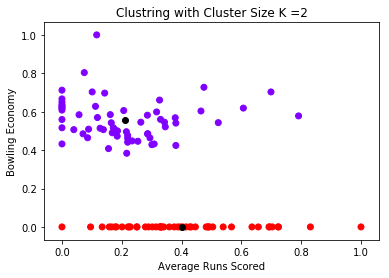

In [14]:
displayClusters (2)

#3 Run K-means for different values of K=2,3,4,5 [3 points]

Visually speaking, both cases when K=4 or K=5, clusters looks good because their centroid has converged in the middle of cluster points. The same can't be said for K=3 scenario.

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


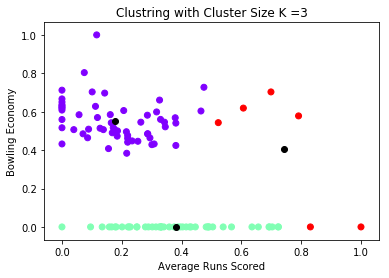

In [15]:
displayClusters (3)

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


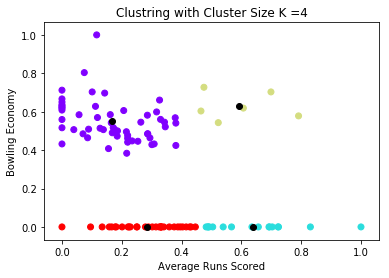

In [16]:
displayClusters (4)

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


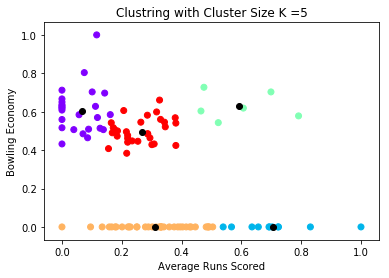

In [17]:
displayClusters (5)

#4 Interpretation of clusters [2 points]

For K=5, we can interpret five clusters as:-
a) Batsmen who has low to moderate average runs (orange)
b) Batsmen who has good average runs (blue)
c) Bowlers who can't bat (purple)
d) Bowlers who can bat moderately (red)
e) Bowlers who can bat very well (green)